# Image Classification Using Convolutional Neural Networks for MNIST (handwritten dataset)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load dataset MINST from tf \
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# view the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


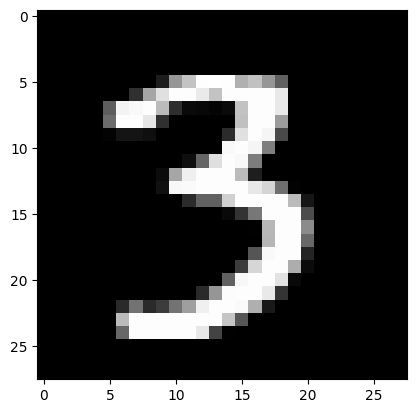

In [ ]:
# visualize available data
plt.imshow(x_train[10000], cmap='gray')
plt.show()

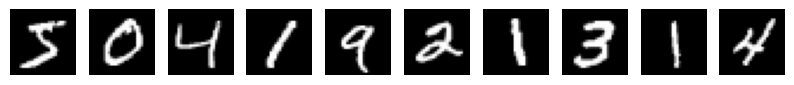

In [ ]:
# Visualize sample images
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:
# Normalize the pixel value
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# View the data

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for artificially improve the model's generalization
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1)
datagen.fit(x_train.reshape(-1, 28, 28, 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=64),
                    epochs=15,
                    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8297 - loss: 0.5364 - val_accuracy: 0.9837 - val_loss: 0.0492
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9670 - loss: 0.1114 - val_accuracy: 0.9878 - val_loss: 0.0369
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9762 - loss: 0.0828 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9796 - loss: 0.0696 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9826 - loss: 0.0559 - val_accuracy: 0.9921 - val_loss: 0.0272
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9919 - val_loss: 0.0246
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9935 - val_loss: 0.0236
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9883 - loss: 0.0397 - val_accurac

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)  # Reshape x_test
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0253
Test Accuracy: 0.9935


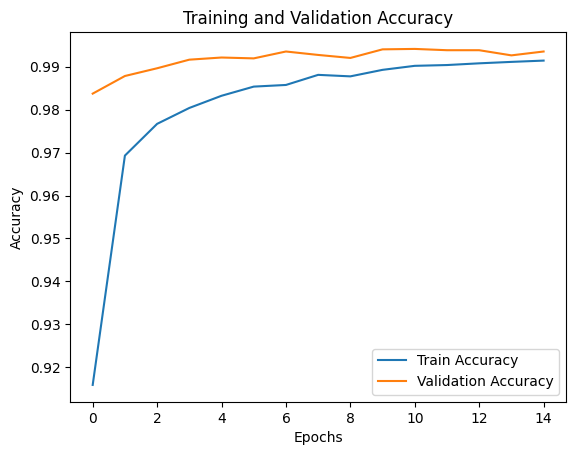

In [ ]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

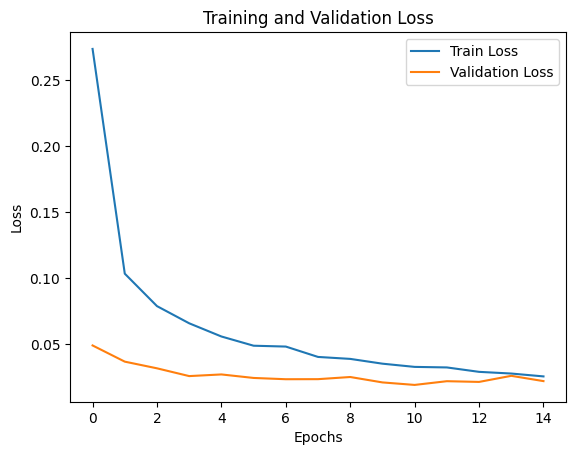

In [ ]:
# plot traning and validation accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('cnn_mnist_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Evaluate the model on Test Data
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) # Reshape x_test to (num_samples, 28, 28, 1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0253
Test Loss: 0.0222
Test Accuracy: 0.9935


In [ ]:
# Predictions for Test Data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Import the classification_report function
from sklearn.metrics import classification_report

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9969    0.9974       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9932    0.9942    0.9937      1032
           3     0.9951    0.9970    0.9960      1010
           4     0.9909    0.9939    0.9924       982
           5     0.9889    0.9944    0.9916       892
           6     0.9948    0.9906    0.9927       958
           7     0.9932    0.9922    0.9927      1028
           8     0.9938    0.9928    0.9933       974
           9     0.9910    0.9851    0.9881      1009

    accuracy                         0.9935     10000
   macro avg     0.9934    0.9935    0.9934     10000
weighted avg     0.9935    0.9935    0.9935     10000



In [ ]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9935
Recall: 0.9935
F1 Score: 0.9935


In [ ]:
# Training Loss and Accuracy
print("Training Accuracy: {:.4f}".format(history.history['accuracy'][-1]))
print("Training Loss: {:.4f}".format(history.history['loss'][-1]))


Training Accuracy: 0.9914
Training Loss: 0.0257


In [ ]:
# Validation Loss and Accuracy
print("Validation Accuracy: {:.4f}".format(history.history['val_accuracy'][-1]))
print("Validation Loss: {:.4f}".format(history.history['val_loss'][-1]))

Validation Accuracy: 0.9935
Validation Loss: 0.0222
